In [8]:
import sympy as sm

In [9]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

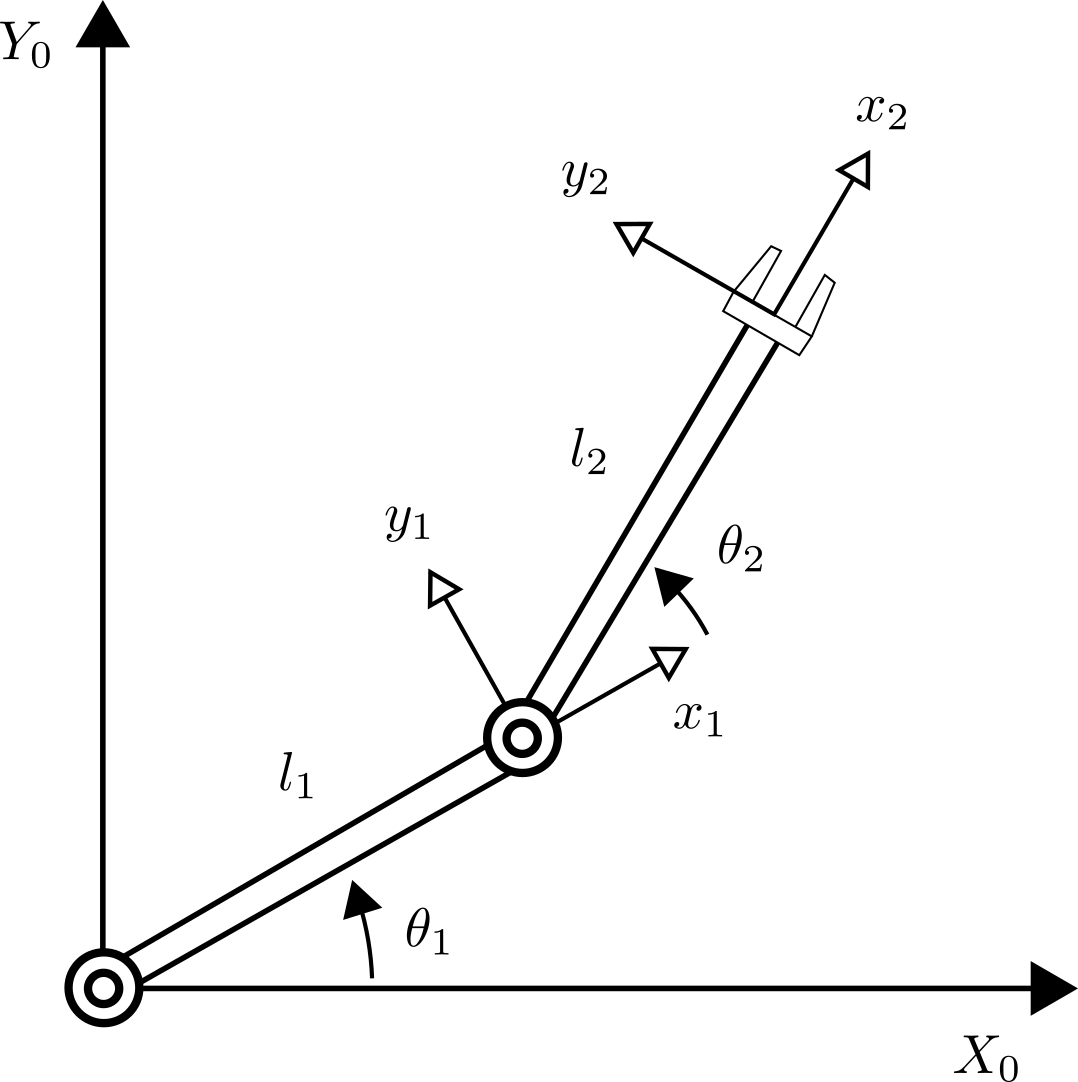

In [37]:
from IPython.display import Image
Image('fig/2rp_new.png', width=300)

In [38]:
from sympy.physics.mechanics import dynamicsymbols

In [39]:
theta1, theta2, l1, l2 = dynamicsymbols('theta1 theta2 l1 l2')
theta1, theta2, l1, l2

(theta1, theta2, l1, l2)

In [40]:
px = l1*sm.cos(theta1) + l2*sm.cos(theta1 + theta2) # tip psition in x-direction
py = l1*sm.sin(theta1) + l2*sm.sin(theta1 + theta2) # tip position in y-direction

In [41]:
# evaluating the jacobian matrix 
a11 = sm.diff(px, theta1) # differentiate px with theta_1
a12 = sm.diff(px, theta2) # differentiate px with theta_2

a21 = sm.diff(py, theta1) # differentiate py with theta_1
a22 = sm.diff(py, theta2) # differentiate py with theta_2

J = sm.Matrix([[a11, a12], [a21, a22]]) # assemble into matix form
Jsim = sm.simplify(J) # simplified result
Jsim

Matrix([
[-l1*sin(theta1) - l2*sin(theta1 + theta2), -l2*sin(theta1 + theta2)],
[ l1*cos(theta1) + l2*cos(theta1 + theta2),  l2*cos(theta1 + theta2)]])

In [42]:
# Manipulator singularities

Jdet = sm.det(Jsim) #determinant of the jacobian matrix
detJ = sm.simplify(Jdet)
detJ

l1*l2*sin(theta2)

In [43]:
sm.solve(detJ, (theta2)) # slove detJ for theta_2

[0, pi]

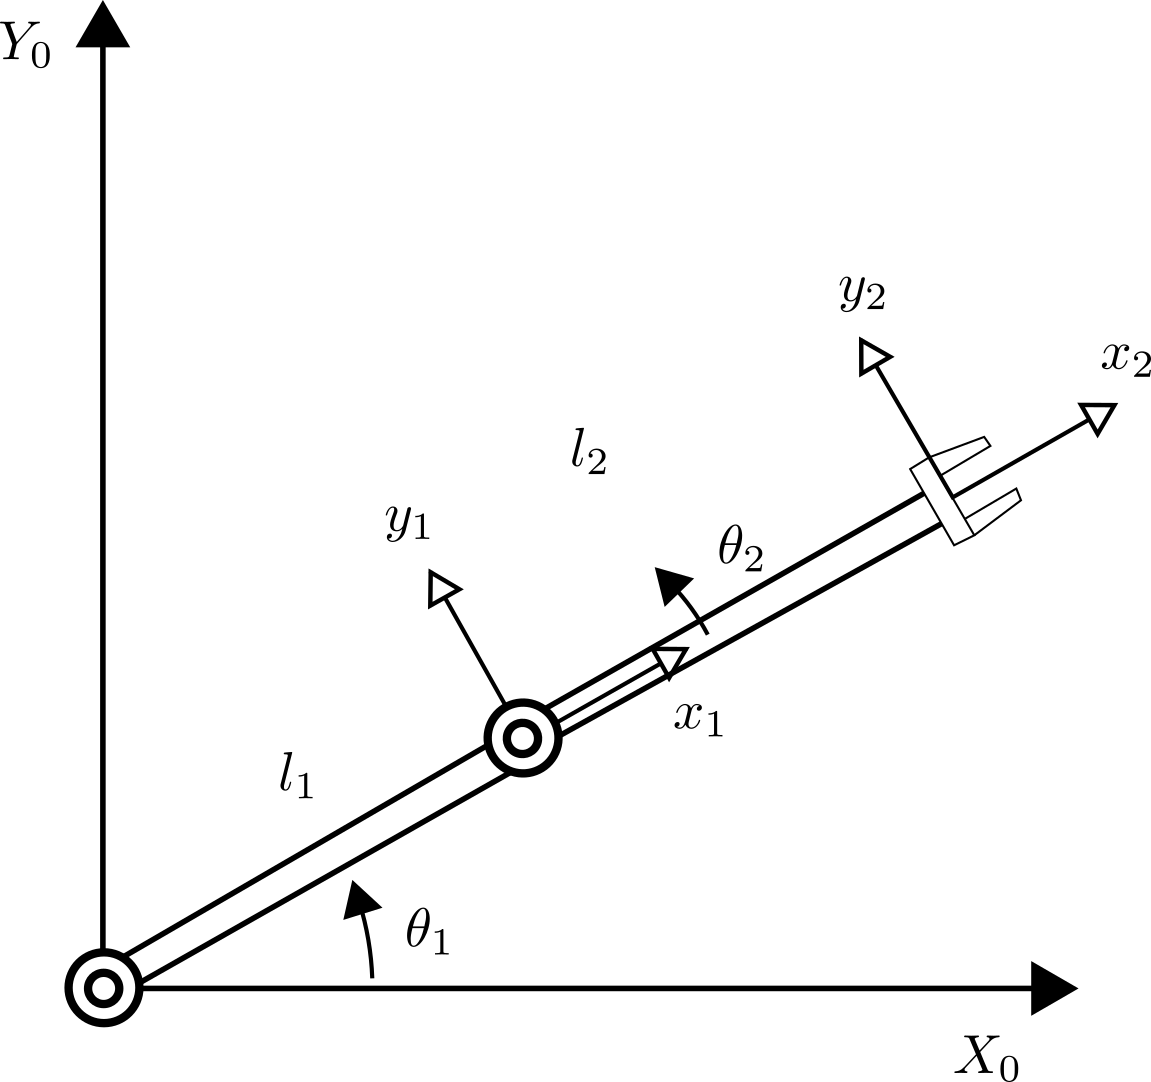

In [44]:
# This means the manipulator will be in singular configuration when the angle  θ2  is either zero or it is  ±π ,
Image('fig/2rp_sing_config1.png', width=300)  # θ2=0 

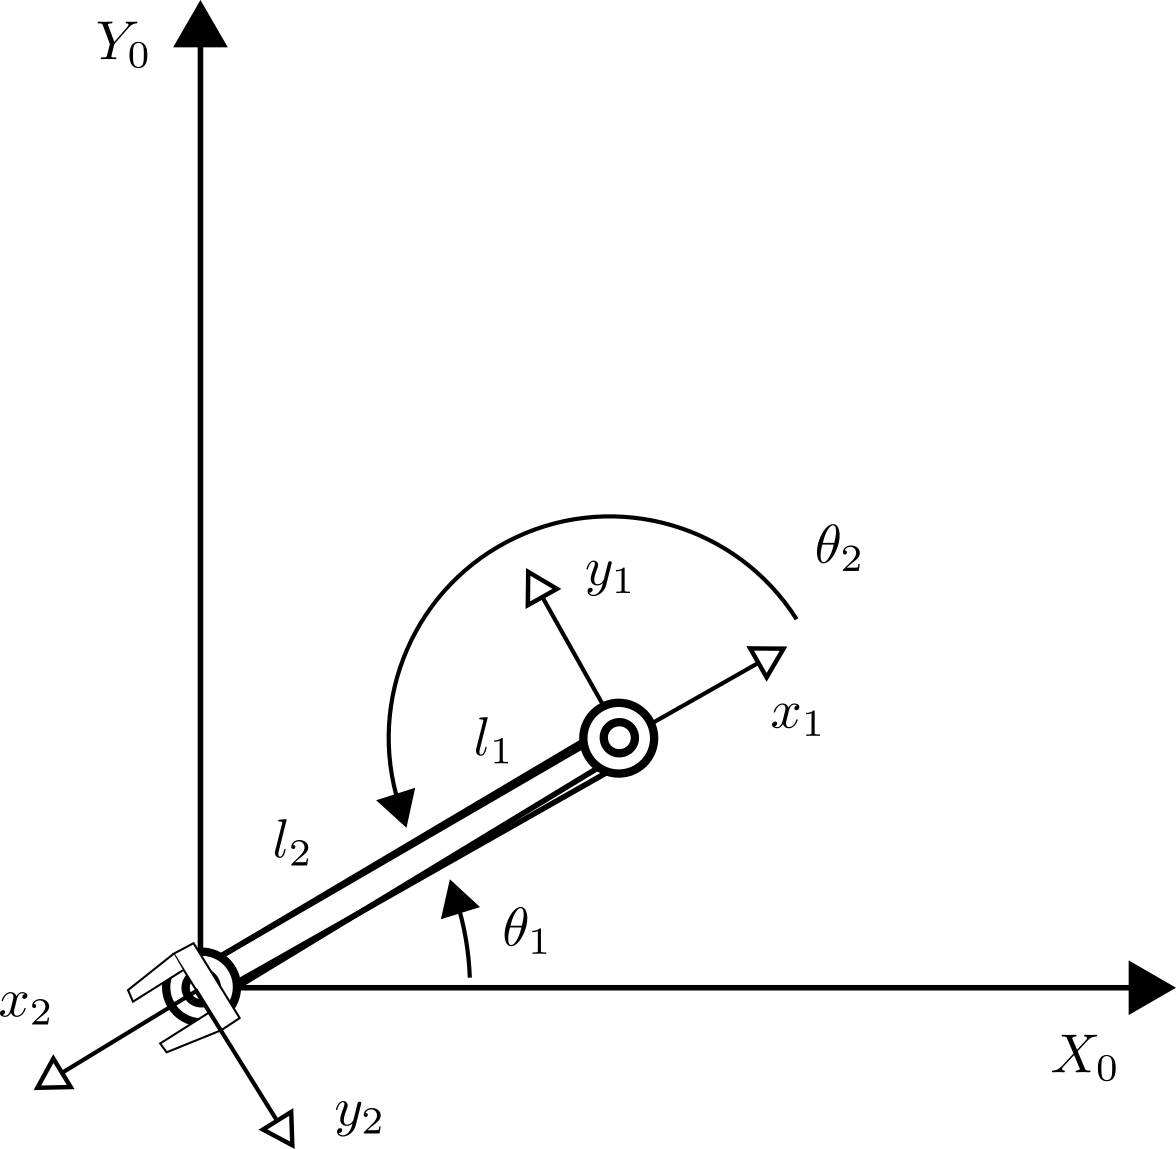

In [46]:
Image('fig/2rp_sing_config2.png', width=300) # θ2=±π 